In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [102]:
# KNN Mnist Digits
mnist = cv2.imread('../datasets/digits.png', 0)
mnist.shape

images = np.array([np.hsplit(row, 100)
          for row in
          np.vsplit(mnist, 50)], dtype= np.float32)

images.shape

#split to train and test

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# create labes

k = np.arange(10)

train_labels = np.repeat(k, 250). reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()

knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result.size

print('Accuracy: {}'.format(accuracy))

Accuracy: 91.64


Accuracy: 71.55555555555556


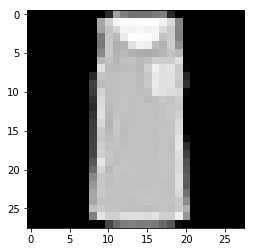

In [103]:
fashion_dataset =  cv2.imread('../datasets/fashion.png', 0)

fashion_images = np.array([np.hsplit(row, 30)
          for row in
          np.vsplit(fashion_dataset, 30)], dtype= np.float32)
fashion_images.shape

#split to train and test

fashion_train_features = fashion_images[:, :15].reshape(-1, (28 * 28))

fashion_test_features = fashion_images[:, 15:30].reshape(-1, (28 * 28))

# create labes

k = np.arange(10)
fashion_train_labels = np.repeat(k, 45). reshape(-1, 1)
fashion_test_labels = fashion_train_labels.copy()

knn2 = cv2.ml.KNearest_create()

knn2.train(fashion_train_features, cv2.ml.ROW_SAMPLE, fashion_train_labels)

ret, result, neighbors, dist = knn2.findNearest(fashion_test_features, 6)

matches = np.equal(result, fashion_test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result.size

print('Accuracy: {}'.format(accuracy))


plt.imshow(fashion_images[0,0], cmap="gray")
plt.show()

In [123]:
# SVM
mnist = cv2.imread('../datasets/digits.png', 0)

images = np.array([np.hsplit(row, 100)
          for row in
          np.vsplit(mnist, 50)], dtype= np.float32)

#split to train and test
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# create labels
k = np.arange(10)
train_labels = np.repeat(k, 250). reshape(-1, 1)
test_labels = train_labels.copy()

model = cv2.ml.SVM_create()

model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

result = model.predict(test_features)

matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result[1].size
accuracy

90.44

In [101]:
# SVM FASHION
fashion_dataset =  cv2.imread('../datasets/fashion.png', 0)
fashion_images = np.array([np.hsplit(row, 30)
          for row in
          np.vsplit(fashion_dataset, 30)], dtype= np.float32)
fashion_images.shape

#split to train and test
fashion_train_features = fashion_images[:, :15].reshape(-1, (28 * 28))
fashion_test_features = fashion_images[:, 15:30].reshape(-1, (28 * 28))

# mean normalization
fashion_train_features -= np.mean(fashion_train_features, axis = 0)
fashion_test_features -= np.mean(fashion_train_features, axis = 0)

k = np.arange(10)
fashion_train_labels = np.repeat(k, 45). reshape(-1, 1)
fashion_test_labels = fashion_train_labels.copy()

model = cv2.ml.SVM_create()

model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(fashion_train_features, cv2.ml.ROW_SAMPLE, fashion_train_labels)

result = model.predict(fashion_test_features)

matches = np.equal(result[1], fashion_test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result[1].size
accuracy

56.44444444444444

# Principal Component Analysis



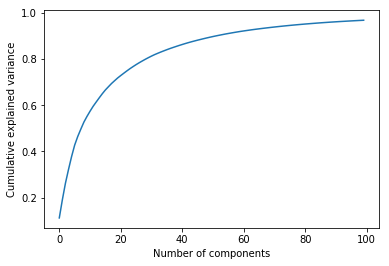

Shape: (2500, 400)
Accuracy: 92.2


In [116]:
# KNN Mnist Digits
mnist = cv2.imread('../datasets/digits.png', 0)
mnist.shape

images = np.array([np.hsplit(row, 100)
          for row in
          np.vsplit(mnist, 50)], dtype= np.float32)

images.shape

#split to train and test

train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))


images = features.reshape(-1, (20 *20))
pca = PCA(n_components = images.shape[1])

pca = PCA(n_components=100)

pca.fit(train_features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print('Shape: {}'.format(train_features.shape))

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)
print('Shape: {}'.format(train_features.shape))


# create labes
k = np.arange(10)

train_labels = np.repeat(k, 250). reshape(-1, 1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()

knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

ret, result, neighbors, dist = knn.findNearest(test_features, 3)

matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result.size

print('Accuracy: {}'.format(accuracy))


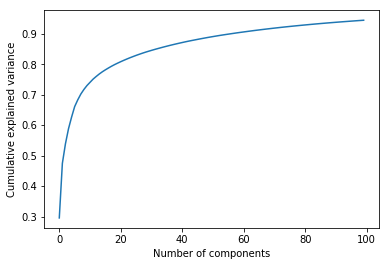

Shape: (450, 784)
Shape: (450, 100)
Accuracy: 71.33333333333333


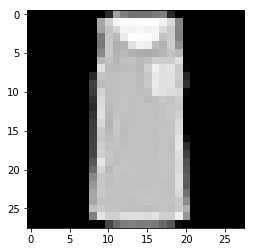

In [117]:
# KNN Fashion

fashion_dataset =  cv2.imread('../datasets/fashion.png', 0)

fashion_images = np.array([np.hsplit(row, 30)
          for row in
          np.vsplit(fashion_dataset, 30)], dtype= np.float32)
fashion_images.shape

#split to train and test

fashion_train_features = fashion_images[:, :15].reshape(-1, (28 * 28))
fashion_test_features = fashion_images[:, 15:30].reshape(-1, (28 * 28))

# PCA
pca = PCA(n_components = fashion_images.shape[1])

pca = PCA(n_components=100)

pca.fit(fashion_train_features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print('Shape: {}'.format(fashion_train_features.shape))

fashion_train_features = pca.transform(fashion_train_features)
fashion_test_features = pca.transform(fashion_test_features)
print('Shape after: {}'.format(fashion_train_features.shape))

# create labes

k = np.arange(10)
fashion_train_labels = np.repeat(k, 45). reshape(-1, 1)
fashion_test_labels = fashion_train_labels.copy()

knn2 = cv2.ml.KNearest_create()

knn2.train(fashion_train_features, cv2.ml.ROW_SAMPLE, fashion_train_labels)

ret, result, neighbors, dist = knn2.findNearest(fashion_test_features, 6)

matches = np.equal(result, fashion_test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result.size

print('Accuracy: {}'.format(accuracy))


plt.imshow(fashion_images[0,0], cmap="gray")
plt.show()

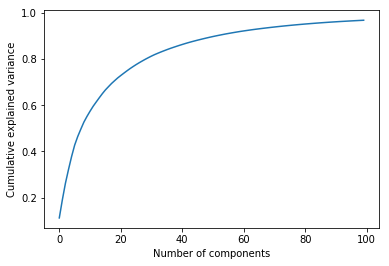

Shape: (2500, 400)
Shape: (2500, 100)


89.44

In [124]:
# SVM Digits
mnist = cv2.imread('../datasets/digits.png', 0)

images = np.array([np.hsplit(row, 100)
          for row in
          np.vsplit(mnist, 50)], dtype= np.float32)

#split to train and test
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

# create labels
k = np.arange(10)
train_labels = np.repeat(k, 250). reshape(-1, 1)
test_labels = train_labels.copy()


images = features.reshape(-1, (20 *20))
pca = PCA(n_components = images.shape[1])

pca = PCA(n_components=100)

pca.fit(train_features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print('Shape: {}'.format(train_features.shape))

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)
print('Shape: {}'.format(train_features.shape))

model = cv2.ml.SVM_create()

model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

result = model.predict(test_features)

matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result[1].size
accuracy


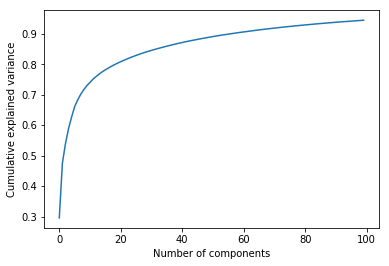

Shape: (450, 784)
Shape after: (450, 100)


72.66666666666667

In [118]:
# SVM FASHION
fashion_dataset =  cv2.imread('../datasets/fashion.png', 0)
fashion_images = np.array([np.hsplit(row, 30)
          for row in
          np.vsplit(fashion_dataset, 30)], dtype= np.float32)
fashion_images.shape

#split to train and test



fashion_train_features = fashion_images[:, :15].reshape(-1, (28 * 28))
fashion_test_features = fashion_images[:, 15:30].reshape(-1, (28 * 28))

pca = PCA(n_components = fashion_images.shape[1])

pca = PCA(n_components=100)

pca.fit(fashion_train_features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print('Shape: {}'.format(fashion_train_features.shape))

fashion_train_features = pca.transform(fashion_train_features)
fashion_test_features = pca.transform(fashion_test_features)
print('Shape after: {}'.format(fashion_train_features.shape))

# mean normalization
# fashion_train_features -= np.mean(fashion_train_features, axis = 0)
# fashion_test_features -= np.mean(fashion_train_features, axis = 0)

k = np.arange(10)
fashion_train_labels = np.repeat(k, 45). reshape(-1, 1)
fashion_test_labels = fashion_train_labels.copy()

model = cv2.ml.SVM_create()

model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

model.train(fashion_train_features, cv2.ml.ROW_SAMPLE, fashion_train_labels)

result =model.predict(fashion_test_features)

matches = np.equal(result[1], fashion_test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct *100.00)/result[1].size
accuracy